In [1]:
#Performing PCA on molecular descriptors
#loading of the datasets.
#Descriptive statitics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


In [2]:
#loading dataset
df = pd.read_csv("moldescrp.csv")
df.describe()


c:\Users\KOJO KORANTENG\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\KOJO KORANTENG\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\KOJO KORANTENG\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.0,999.000000,999.0,999.000000
mean,13.334079,-5.212858,13.334079,1.360545,0.422019,511.457720,472.780388,511.031235,198.653654,0.082082,...,0.029029,0.019019,0.003003,0.004004,0.004004,0.018018,0.0,0.016016,0.0,0.030030
std,2.321153,1.418909,2.321153,1.009433,0.262053,322.257419,295.051292,322.046922,128.978700,1.079630,...,0.190343,0.136660,0.054745,0.063182,0.063182,0.183693,0.0,0.160609,0.0,0.176526
min,6.821759,-11.549187,6.821759,0.003148,0.005545,85.062000,78.050000,85.016378,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,12.418686,-6.260347,12.418686,0.598413,0.177188,327.358000,304.216000,327.128865,126.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,13.787295,-5.038417,13.787295,1.129343,0.442605,422.480000,394.230000,421.160183,158.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,14.765660,-4.214980,14.765660,1.987600,0.641003,601.765500,555.408000,601.317198,234.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
max,20.485981,0.240365,20.485981,4.295285,0.945542,4293.239000,3973.703000,4290.824852,1678.000000,21.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.0,2.000000,0.0,2.000000


In [3]:
#checking for missing values.
print(df.isnull().sum())


MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64


In [4]:
#creating a temporary ID to track drop rows
df['temp_id'] = df.index

# Replace inf/-inf with NaN, then drop all rows with NaN values
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

# Verify the cleaned data
df_clean.shape
#nan_rows = df_clean.isna().any(axis=1)
#print(nan_rows)

# Find dropped rows
dropped = df[~df['temp_id'].isin(df_clean['temp_id'])]
print(dropped)

     MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
350       12.383071       -5.292449          12.383071           1.443374   

          qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
350  0.413592  408.456         375.192  407.190128                  148   

     NumRadicalElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
350                    1  ...             0           0                  0   

     fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
350             0            0            0             0                 0   

     fr_urea  temp_id  
350        0      350  

[1 rows x 209 columns]


In [5]:

# Display the 351st row (0-based indexing)
print(df.iloc[350])

MaxEStateIndex        12.383071
MinEStateIndex        -5.292449
MaxAbsEStateIndex     12.383071
MinAbsEStateIndex      1.443374
qed                    0.413592
                        ...    
fr_thiocyan            0.000000
fr_thiophene           0.000000
fr_unbrch_alkane       0.000000
fr_urea                0.000000
temp_id              350.000000
Name: 350, Length: 209, dtype: float64


In [6]:
# Standardize the cleaned data
X_clean = StandardScaler().fit_transform(df_clean)
X_clean


c:\Users\KOJO KORANTENG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\KOJO KORANTENG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\KOJO KORANTENG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\KOJO KORANTENG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:81: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


array([[-0.10801298,  0.51137616, -0.10801298, ...,  0.        ,
        -0.1702897 , -1.73020051],
       [ 0.2313801 ,  0.64952646,  0.2313801 , ...,  0.        ,
        -0.1702897 , -1.72673421],
       [ 0.79524589, -0.63534295,  0.79524589, ...,  0.        ,
        -0.1702897 , -1.72326791],
       ...,
       [ 1.19192196, -0.66489611,  1.19192196, ...,  0.        ,
        -0.1702897 ,  1.72223288],
       [ 0.97038816, -0.28003712,  0.97038816, ...,  0.        ,
        -0.1702897 ,  1.72569918],
       [ 1.5751502 , -0.35364847,  1.5751502 , ...,  0.        ,
        -0.1702897 ,  1.72916548]])

In [7]:
#imputing after scaling

imputer = SimpleImputer(strategy='constant', fill_value=0)
df_no_nan = imputer.fit_transform(X_clean)

c:\Users\KOJO KORANTENG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [8]:
# Perform PCA
pca_clean = PCA(n_components=0.90)
X_pca_clean = pca_clean.fit_transform(df_no_nan)

In [9]:
# Explained and cumulative variance
explained_variance_ratio = pca_clean.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [11]:
features = df.select_dtypes(include=[float, int])

# The loading matrix (features x components)
loadings = pca_clean.components_.T

# Create a DataFrame for readability
loading_matrix = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=features.columns
)
print(loading_matrix)
# Save the loading matrix to a CSV file
loading_matrix.to_csv('pca_loading_matrix.csv')


                        PC1       PC2       PC3       PC4       PC5       PC6  \
MaxEStateIndex     0.078661  0.016411  0.004041  0.042084 -0.138535  0.142509   
MinEStateIndex    -0.107763  0.091693 -0.056207 -0.036497  0.049500 -0.022996   
MaxAbsEStateIndex  0.078661  0.016411  0.004041  0.042084 -0.138535  0.142509   
MinAbsEStateIndex  0.057255 -0.168380  0.037884 -0.072296  0.019367  0.058206   
qed               -0.097408  0.039514  0.050275  0.055091  0.033526  0.034369   
...                     ...       ...       ...       ...       ...       ...   
fr_thiocyan        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
fr_thiophene      -0.005031  0.010377 -0.007750  0.028288 -0.014427 -0.035502   
fr_unbrch_alkane   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
fr_urea           -0.008027  0.026208 -0.012396  0.085381 -0.004049  0.049696   
temp_id            0.000995 -0.000753  0.003313 -0.008013  0.006020 -0.005030   

                        PC7

In [11]:
# Create a DataFrame of the PCA results
pca_df = pd.DataFrame(X_pca_clean, columns=[f'PC{i+1}' for i in range(X_pca_clean.shape[1])])
pca_df.to_csv('pca_results.csv', index=False)

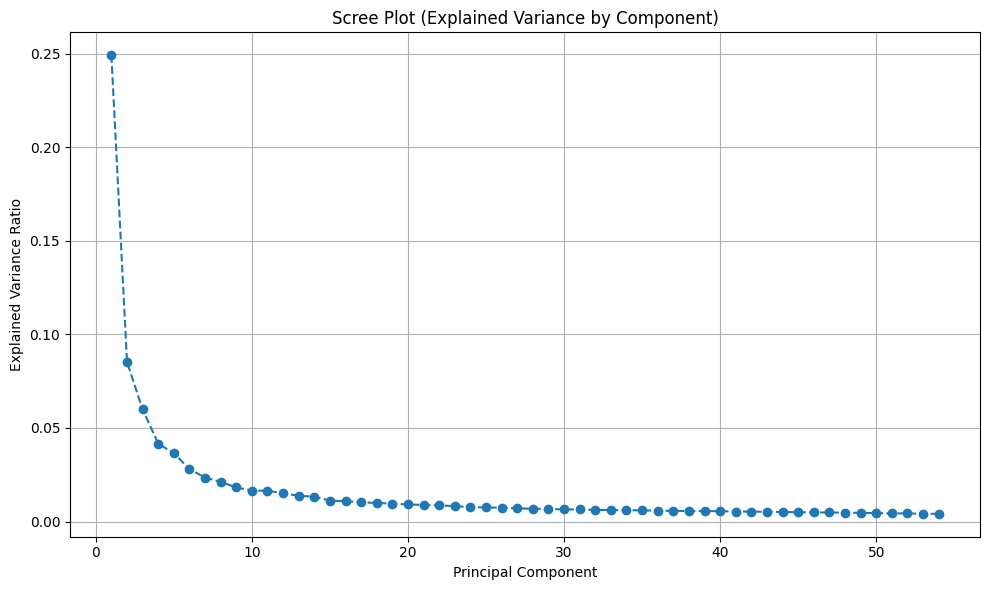

In [20]:
# Plot: Scree plot

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot (Explained Variance by Component)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("screeplot.png", dpi = 200)

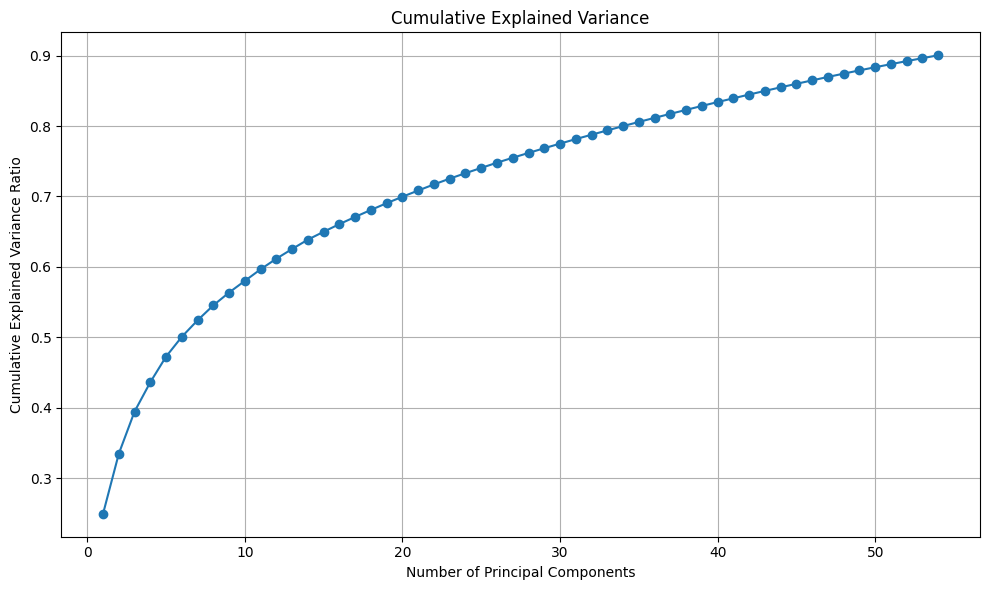

In [21]:
# Plot: Cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig("cumulative_ex.png", dpi=200)


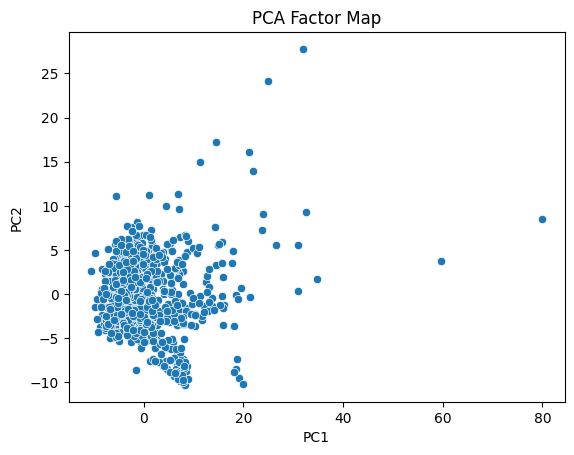

In [22]:
# Factor Map (First 2 PCs)
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA Factor Map')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.show()
plt.savefig("factormap.png", dpi = 200)

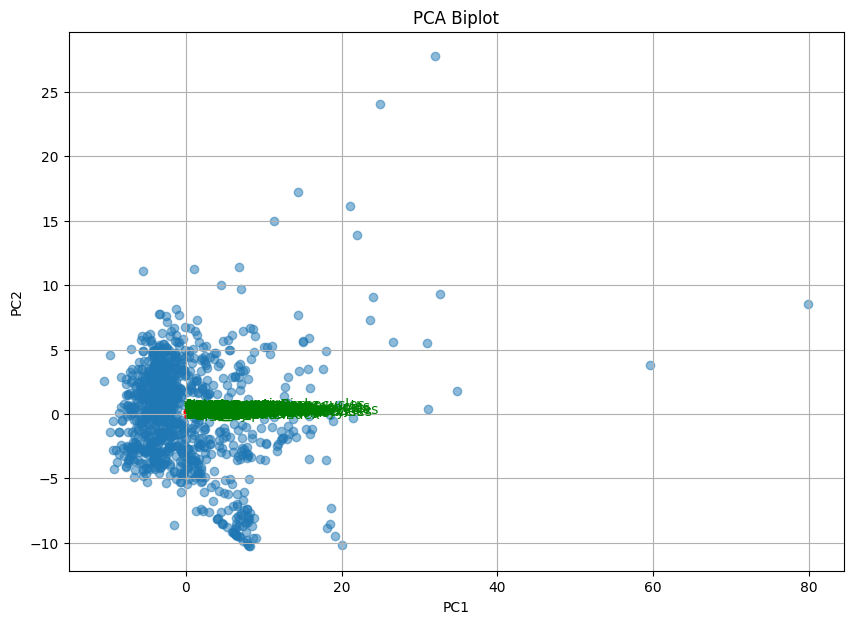

In [23]:
# Biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.figure(figsize=(10, 7))
    plt.scatter(xs, ys, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0]*2, coeff[i, 1]*2, color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0]*2.2, coeff[i, 1]*2.2, f"Var{i+1}", color='g')
        else:
            plt.text(coeff[i, 0]*2.2, coeff[i, 1]*2.2, labels[i], color='g')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()
    plt.title('PCA Biplot')
    #plt.show()
    plt.savefig("biplot.png")

biplot(X_pca_clean, pca_clean.components_.T, labels=df.columns)